#### 04_차량 이미지 예제

In [1]:
# %pip install pytesseract
'''
pytesseract은 Python에서 Tesseract OCR 엔진에 액세스하기 위한 인터페이스입니다. 
Tesseract OCR은 Google에서 개발한 오픈 소스 OCR(광학 문자 인식) 엔진으로, 이미지에서 
텍스트를 추출하는 데 사용됩니다.
'''

'\npytesseract은 Python에서 Tesseract OCR 엔진에 액세스하기 위한 인터페이스입니다. \nTesseract OCR은 Google에서 개발한 오픈 소스 OCR(광학 문자 인식) 엔진으로, 이미지에서 \n텍스트를 추출하는 데 사용됩니다.\n'

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

# text = pytesseract.image_to_string(image)
# print(text)

##### 04_01 차량 이미지 파일 읽기

이미지 크기 >> 720 960


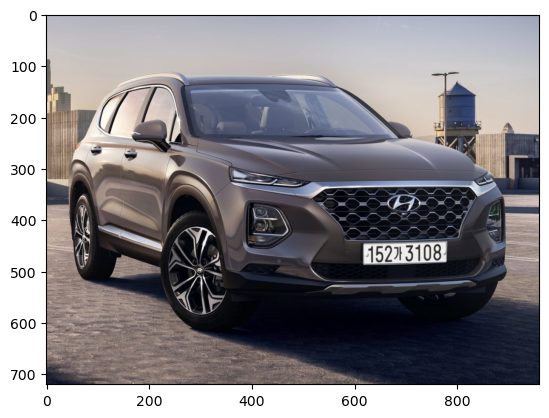

In [3]:
# 차량 이미지 파일 불러오기
image_path = '../99_Studyfile/02_Sample/car_license_plate.jpeg'
image = cv2.imread(image_path)

"""
None : 경로 오류
"""

# 색상 문제 발생 RGB 컨버터
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 사이즈 확인
height, width, channel = image.shape
print('이미지 크기 >>', height, width)

plt.imshow(image)
plt.show()

#### 04_02 GrayScale 변환

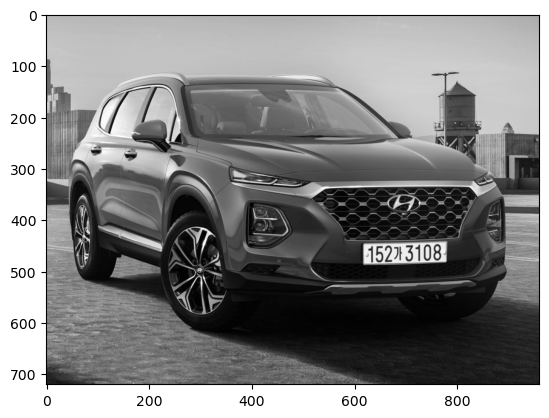

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, 'gray')
plt.show()

#### 04_03 콘트라스트 최대화 Maximize Contrast

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


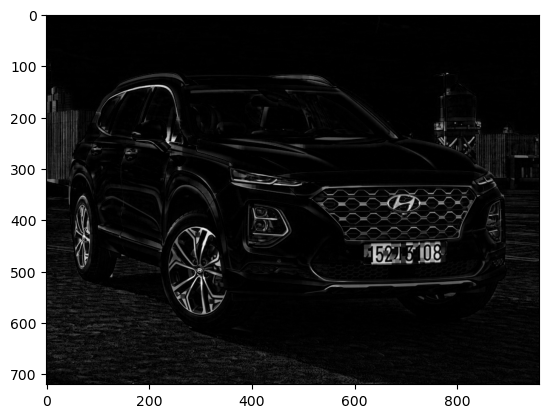

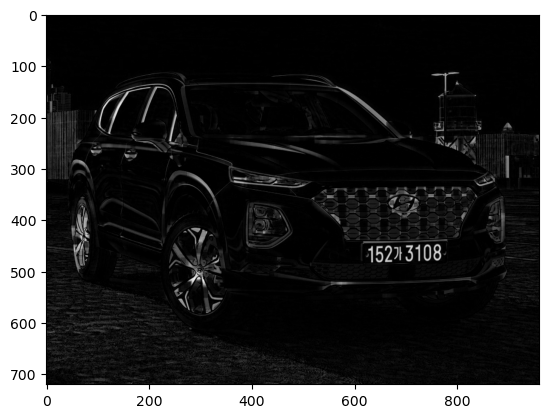

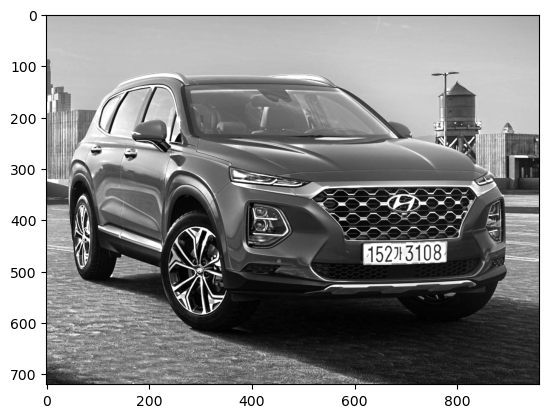

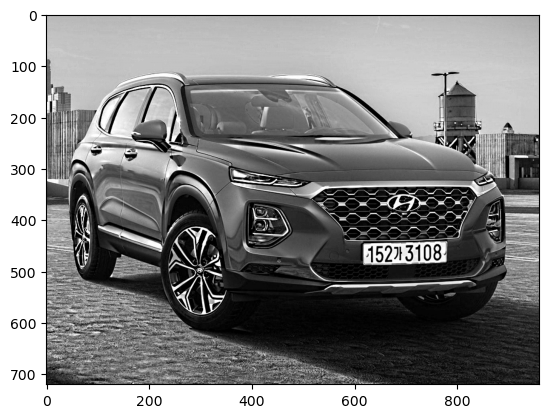

In [5]:
# 모폴로지 연산
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))  # 9,9 사이즈의 직사각형, 커널값
print(structuringElement)

# TOPHOT -> 밝기 값이 크게 변화하는 영역을 강조
imgTopHat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, structuringElement)

# BLACKHAT -> 어두운 부분을 강조
imgBlackHat = cv2.morphologyEx(gray_image, cv2.MORPH_BLACKHAT, structuringElement)


# 합치기
imgGrayScalePlusToHat = cv2.add(gray_image, imgTopHat)

# 뺄셈 연산
imgGrayScaleMinusBlHat = cv2.subtract(imgGrayScalePlusToHat, imgBlackHat)


plt.imshow(imgTopHat, 'gray')
plt.show()

plt.imshow(imgBlackHat, 'gray')
plt.show()

plt.imshow(imgGrayScalePlusToHat, 'gray')
plt.show()

plt.imshow(imgGrayScaleMinusBlHat, 'gray')
plt.show()

#### 04_04 이진화 Adaptive Thresholding

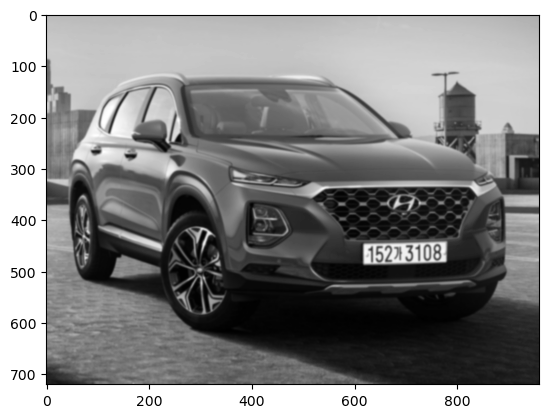

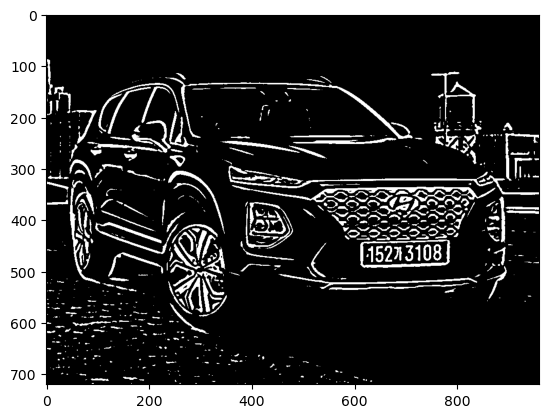

In [6]:
img_blurred = cv2.GaussianBlur(gray_image, ksize=(7,7), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue = 255.0,
    adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType = cv2.THRESH_BINARY_INV,
    blockSize = 19, # 주변 픽셀 크기 : 홀수 사용
    C = 9
)

plt.imshow(img_blurred,'gray')
plt.show()

plt.imshow(img_thresh,'gray')
plt.show()


#### 04_05 외각선 검출 Find Contours

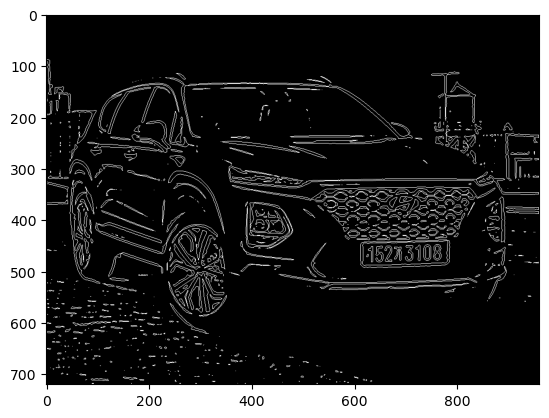

'\nCanny 에지 검출과 findContours 함수는 서로 다른 기술이지만, 윤곽선을 추출하는 작업에 함께 사용될 수 있습니다. \nCanny 에지 검출을 통해 이미지에서 에지를 찾은 후, 해당 에지를 findContours 함수로 전달하여 윤곽선을 추출하는 방식으로 활용될 수 있습니다.\n'

In [7]:
contours, hiearchy = cv2.findContours(
    img_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

# print(contours)

temp_result = np.zeros((height,width,channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255,255,255))

plt.imshow(temp_result,'gray')
plt.show()

"""
Canny 에지 검출과 findContours 함수는 서로 다른 기술이지만, 윤곽선을 추출하는 작업에 함께 사용될 수 있습니다. 
Canny 에지 검출을 통해 이미지에서 에지를 찾은 후, 해당 에지를 findContours 함수로 전달하여 윤곽선을 추출하는 방식으로 활용될 수 있습니다.
"""

#### 04_06 바운딩 박스 표시 Bounding Rectangle

In [8]:
%pip install opencv-python==4.5.5.64

Note: you may need to restart the kernel to use updated packages.


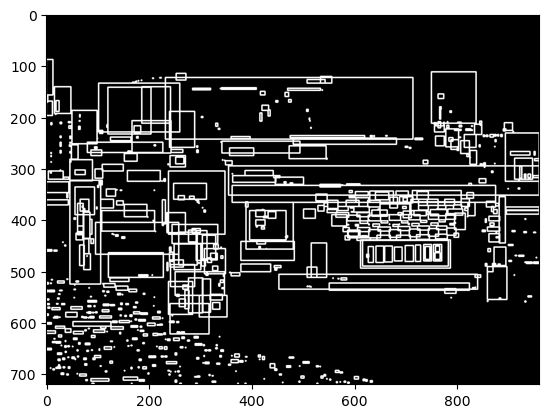

In [11]:
temp_result = np.zeros((height,width,channel),dtype=np.uint8)

contours_dict = []

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=2)
    
    contours_dict.append({
        'contour' : contour,
        'x' : x,
        'y' : y,
        'w' : w,
        'h' : h,
        'cx' : x + (w/2),
        'cy' : y + (h/2)
    })

plt.imshow(temp_result, 'gray')
plt.show()    

#### 04_07 Select Candidates by Char Size
- 작은 사이즈의 박스들을 다 제거

720 960 3


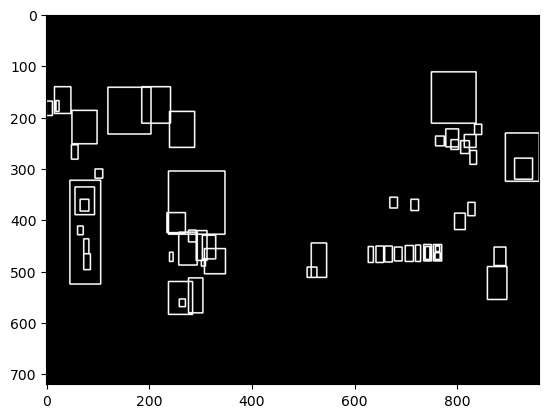

In [12]:
MIN_AREA =80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0

for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH \
    and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
    # print(possible_contours) : 걸러지고 남은 값


# Visualize possibel contours
print(height,width,channel)
temp_result = np.zeros((height,width,channel), dtype=np.uint8)

for d in possible_contours :
    # x1, y1, w1, h1 = d['x'], d['y'], d['w'], d['h']
    # print(x1, y1, h1, w1) : 좌표 값
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255,255,255), thickness=2)
    
plt.imshow(temp_result,'gray')
plt.show()

#### 04_08 Select Candidates by Arrangement of Contours
- 윤곽선의 배열에 따라 후보를 선택하는 작업

In [13]:
MAX_DIAG_MUTLIPLAYER = 3    # 윤곽선 사이 최대 대각선 차이
MAX_ANGLE_DIFF = 12.0       # 두 윤곽선 사이 각도 최대차이
MAX_AREA_DIFF = 0.5         # 두 윤곽선 사이의 최대 면적 차이
MAX_WIDTH_DIFF = 0.8        # 두 윤곽선 사이의 최대 너비 차이
MAX_HEIGHT_DIFF =0.2        # 두 윤곽선 사이의 최대 높이 차이
MIN_N_MATHED = 3            # 윤곽선의 최소 개수

def find_chars(contour_list):
    matched_result_idx =[]
    
    for d1 in contour_list:
        matched_result_idx=[]
        
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue
            
            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])
            
            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2) # 거리 구하는 공식
            
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))

            
            if dx==0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy/dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])    # 정규화 : (d1면적 - d2면적 차이) / d1면적
            width_diff = abs(d1['w'] - d2['w']) / d1['w']   # 정규화
            height_diff = abs(d1['h'] - d2['h']) / d1['h']  # 정규화
            
            # 걸러내기
            if distance < diagonal_length1 * MAX_DIAG_MUTLIPLAYER \
            and angle_diff < MAX_ANGLE_DIFF \
            and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF \
            and height_diff < MAX_HEIGHT_DIFF :
                matched_contours_idx.append(d2['idx'])
        
        # append this contour
        matched_contours_idx.append(d1['idx'])
        
        if len(matched_contours_idx) < MIN_N_MATHED:
            continue
        
        matched_result_idx.append(matched_contours_idx)
        
        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])
            
        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)   # 매칭되지 않는 객체 추출, 변수에 저장
            
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)  # 걸러낸 것들의 글자 찾기

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)
            
        break
        
    return matched_result_idx
    
result_idx = find_chars(possible_contours)
            
matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
    
# visualize possible contours
temp_result = np.zeros((height,width,channel), dtype=np.uint8)
for r in matched_result:
    for d in r:
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']),
                        color=(255, 255, 255), thickness=2)
plt.imshow(temp_result, 'gray')
plt.show()

NameError: name 'matched_contours_idx' is not defined

#### 04_09 차량 번호판 이미지 회전시키는 작업

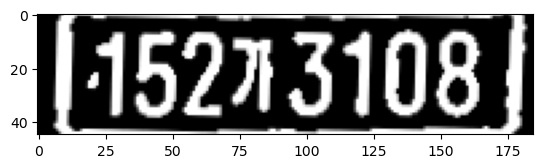

In [ ]:
PLATE_WIDTH_PADDING = 1.3   # 번호판 주변 여유공간
PLATE_HEIGHT_PADDING = 1.5  
MIN_PLATE_RATIO = 3 # 가로세로 최소값 / 최대값
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

""" 
[ lambda 매개변수 : 표현식 ]

add = lambda x, y : x + y
result_test = add(3, 5)
print (result_test)
"""

for i, matched_chars in enumerate(matched_result) :
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])
    # ambda 함수를 사용하여 x 라는 변수를 입력으로 받고, 해당 변수의 'cx' 키에 대한 값을 반환하는 함수를 정의한 것이
    
    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) /2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) /2
    # print(plate_cx,plate_cy)
    
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING 
    # sorted_chars 리스트에서 가장 오른쪽 요소와 가장 왼쪽 요소의 'x' 값과 너비('w')를 이용하여 번호판의 폭을 계산하는 부분입니다.
    
    sum_height = 0
    for d in sorted_chars :
        sum_height += d['h']
        
    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    # 리스트에 있는 각 요소의 높이('h') 값을 모두 더한 후, 평균 높이를 계산하여 번호판의 높이를 결정하는 부분입니다.
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    # 리스트에서 가장 오른쪽 요소와 가장 왼쪽 요소의 중심점('cy') 값을 이용하여 삼각형의 높이를 계산하는 부분입니다.
    
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height/triangle_hypotenus))

    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx,plate_cy), angle=angle, scale=1.0)
    # cv2.getRotationMatrix2D 함수는 중심점을 기준으로 이미지를 회전하기 위한 변환 행렬을 생성하는 함수입니다.

    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    # cv2.warpAffine 함수는 이미지에 변환 행렬을 적용하여 이미지를 변환하는 함수입니다.

    img_cropped = cv2.getRectSubPix(
        # cv2.getRectSubPix() 함수는 지정한 영역을 잘라낸 결과 이미지를 반환합니다.
        img_rotated,
        patchSize = (int(plate_width), int(plate_height)),
        center = (int(plate_cx), int(plate_cy))
    )
    plate_imgs.append(img_cropped)

    plate_infos.append({
        'x' : int(plate_cx - plate_width/2),
        'y' : int(plate_cy - plate_height/2),
        'w' : int(plate_width),
        'h' : int(plate_height)
    })

plt.imshow(img_cropped, 'gray')
plt.show()

#### 04_10 Another Thresholding to Find Chars

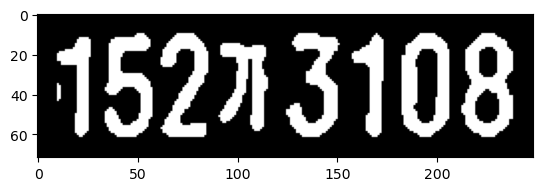

In [ ]:
longest_idx, longest_text = -1,0
plate_chars = []

for i , plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0,0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0 , type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    contours, hiearchy = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0
    
    for contour in contours :
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h
        
        if area > MIN_AREA \
            and w > MIN_WIDTH \
            and h > MIN_HEIGHT \
            and MIN_RATIO < ratio < MAX_RATIO:
                if x < plate_min_x:
                    plate_min_x = x
                if y < plate_min_y:
                    plate_min_y = y
                if x + w > plate_max_x:
                    plate_max_x = x + w
                if y + h > plate_max_y:
                    plate_max_y = y + h
                    
img_result = plate_img[plate_min_y : plate_max_y, plate_min_x : plate_max_x]

img_result = cv2.GaussianBlur(img_result, ksize=(3,3), sigmaX=0)
_, img_result = cv2.threshold(img_result,thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_result = cv2.copyMakeBorder(img_result,top=10, bottom=10, left=10, right=10,
                                borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
plt.imshow(img_result, 'gray')
plt.show()

# text = pytesseract.image_to_string(img_result)
# print(text)

#### 04_11 번호판 바운딩 박스 표시 결과 이미지

{'x': 604, 'y': 443, 'w': 185, 'h': 45}


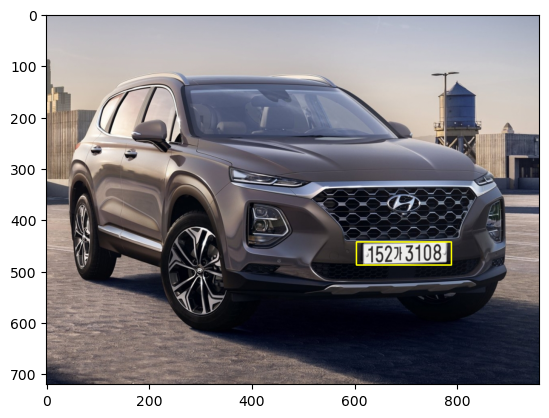

In [ ]:
info = plate_infos[longest_idx]
img_out = image.copy()

print(info)

cv2.rectangle(img_out, (info['x'], info['y'],), (info['x'] + info['w'], info['y'] + info['h']), color=(255,255,0), thickness=2)

plt.imshow(img_out)
plt.show()